# Part 2 of Recipes: Link Geometry - Detailed Bezier Control

This page is primarily based on the following page at the Circos documentation site:



- [2. Link Geometry - Detailed Bezier Control](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 1 by clicking [here &#8592;](Recipes_Part1.ipynb).



----



8 --- Recipes
=============

2. Link Geometry - Detailed Bezier Control
------------------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/link_geometry/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/link_geometry/images){.normal}
[Configuration](/documentation/tutorials/recipes/link_geometry/configuration){.normal}
:::

The raison d\'etre of Circos is the ability to draw links. Links are
covered in tutorial 5. Link geometry is controlled by many parameters
(see tutorial 5.2).

Below, I\'ll walk through some geometry recipes to help illustrate how
the parameters interact.

### straight lines

To draw links with straight lines, keep bezier\_radius undefined. Below
I set the link radius to be nearly at the inner ideogram radius (0.98r).
I also hide links associated with smaller segmental duplications
(\<1.5kb), set the thickness based on the size of the segmental
duplication (scaled exponentially in the range 1-6), and color red those
links that eminate from a region on chromosome 2.

```ini
radius = 0.98r
# comment out bezier_radius, or leave out
#bezier_radius        = 0.9r
```


```ini
<link segdup>
color        = vdgrey
thickness    = 2
file         = data/5/segdup.txt
</link>
```


```ini
<rules>
```


```ini
<rule>
importance = 110
condition  = _SIZE1_ < 1.75kb || _SIZE2_ < 1.75kb
show       = no
</rule>
<rule>
importance = 100
condition  = 1
thickness  = eval(max(1,min(6,exp(_SIZE1_/50000))))
flow       = continue
</rule>
<rule>
importance = 90
condition  = (_CHR1_ eq "hs2" && abs(_START1_ - 100Mb) < 20Mb) || (_CHR2_ eq "hs2" && abs(_START2_ - 100Mb) < 20Mb)
color      = red
</rule>
</rules>
```


Notice that you can use common suffixes like kb and Mb to indicate a
value multiplier.

### bezier curves

Straight lines are not always the best way to draw links, especially for
links that join two closely spaced points. The bezier\_radius parameter,
when defined, controls the curvature of the line by establishing a third
control point of the line at an angle that bisects the position of the
start and end of the link.

The bezier\_radius specifies the radius at this control point. Using the
start and end of the link, and the control point, a bezier curve is
drawn. Note that the bezier curve generally does not pass through the
control point, but merely comes close.

Thus, the larger the bezier radius, the greater the affinity of the
middle of the link line to the ideogram circle. A bezier\_radius of
zero, on the other hand, will result in great affinity of each link to
the center of the circle.

You generally will be setting the bezier\_radius as a relative value. It
will be relative to the inner ideogram radius.

```ini
bezier_radius = 0.25r
```


You can set the bezier\_radius to be negative, which will result in some
weird link layouts (the control point will be placed at the same radial
position but on the other side of the circle).

### dynamically altering geometry parameters

You can use rules to adjust the bezier\_radius. For example, links
between closely spaced points on the same ideogram should get a large
bezier radius to avoid the link from being drawn too far into the
circle, only to double back on itself. In the rule below, any
intrachromosomal links with ends within 50Mb will have a bezier\_radius
of 0.75r (vs all other links with bezier\_radius of 0.5r, for example).

```ini
<rules>
<rule>
importance    = 95
condition     = _CHR1_ eq _CHR2_ && abs(_START1_-_START2_) < 50Mb
bezier_radius = 0.75r
flow          = continue
</rule>
</rules>
```


You can also dynamically remap the bezier\_radius using an eval()
condition. For example, the rule below will adjust it to range from 0.5r
to 0.9r smoothly (links 100Mb apart will have a bezier\_radius of 0.5r
which will increase to 0.9r as the link ends fall closer). The unit
\"r\" has to be explicitly concatenated onto the new bezier\_radius in
the eval() expression.

```ini
<rule>
importance     = 95
condition      = _CHR1_ eq _CHR2_ && abs(_START1_-_START2_) < 100Mb
bezier_radius  = eval( (0.5 + 0.4*( 1 - abs(_START1_-_START2_) / 100Mb )) . "r" )
flow           = continue
</rule>
```


The choice of parameters in the rules (0.5, 0.4, and 100Mb) are
arbitrary and guided by desired esthetics of the final image.

### making link ends perpendicular to ideograms

As you can see from the images in the previous examples, links with ends
that are far apart impinge on the ideogram at a shallow angle.

If you would like the link lines to be perpendicular to the ideogram,
additional curve control points are necessary. To do this, the crest
parameter is used to set two additional control points at the same
angular position as the link start and end, but at a radial position
closer to the center of the circle (see tutorial 5.2).

The crest parameter is automatically relative to the link radius and
bezier radius. When crest = 0 (no effect), the crest control point is at
the same radial position as the link start/end. When crest = 1, the
control point is placed at the bezier\_radius (see [this
image](http://mkweb.bcgsc.ca/circos/tutorials/5/2/image-04.png) from
tutorial 5.2).

### isolating interchromosomal links

Rules make it easy to hide links that are do not fit a condition. For
example, to draw only interchromosomal links (between different
chromosomes), hide all intrachromosomal links

```ini
<rule>
importance = 100
condition  = _CHR1_ eq _CHR2_
show       = no
</rule>
```


You can deal with interchromosomal and intrachromosomal links separately
by either (a) setting up two tracks with two different hide rules (one
track will have interchromosomal links hidden, the other
intrachromosomal links hidden) or (b) setting up two sets of rules (one
or more rules for interchromosomal links and one or more rules for
intrachromosomal links).

```ini
<rules>
```


```ini
# intrachromosomal links with ends within 40 Mb placed outside circle
```


```ini
<rule>
importance = 90
condition  = _CHR1_ eq _CHR2_ && abs(_START1_-_START2_) < 40Mb
radius        = 1r+125p
bezier_radius = 1r+225p
crest         = 1
color         = red
</rule>
```


```ini
# all other intrachromosomeal links hidden
```


```ini
<rule>
importance = 80
condition  = _CHR1_ eq _CHR2_
show       = no
</rule>
```


```ini
# interchromosomeal links involving start
# of chromosome are inside circle
```


```ini
<rule>
importance = 70
condition  = _CHR1_ ne _CHR2_ && (_START1_ < 20Mb || _START2_ < 20Mb)
color      = black
radius     = 0.99r
bezier_radius = 0.5r
crest         = 1
</rule>
```


```ini
# all remaining links are hidden
```


```ini
<rule>
importance = 10
condition  = 1
show       = no
</rule>
```


```ini
</rules>
```


### bulging links with bezier\_radius and crest

Some combinations of bezier\_radius and crest values result in links
that appear to bulge. That is, they run radially for quite a distance
from the ideograms and then swing around the center of the image.

For a given bezier\_radius value, the crest value that generates this
behaviour is 1/(1-bezier\_radius). For example, for a bezier\_radius of
0.75r, a crest value of 4 will yield bulging links. Crest values
significantly larger than this can create undesirable loops in the
curves.

Large negative crest values produce links that look like the rings of
Saturn. Small negative crest values yield undulating links for links
with closely spaced ends.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/2/

/home/jovyan/circos-tutorials-0.67/tutorials/8/2


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.37s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.38s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/2
debuggroup summary 0.38s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.38s loading configuration from file circos.conf
debuggroup summary 0.38s found conf file circos.conf
debuggroup summary 0.55s debug will appear for these features: output,summary
debuggroup summary 0.55s bitmap output image ./circos.png
debuggroup summary 0.55s SVG output image ./circos.svg
debuggroup summary 0.55s parsing karyotype and organizing ideograms
debuggroup summary 0.64s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.64s applying global and local scaling
debuggroup summary 0.65s allocating image, colors and brushes
debuggroup summary 2.60s drawing 4 ideograms of total size 881,626,704
debuggroup summary 2.60s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

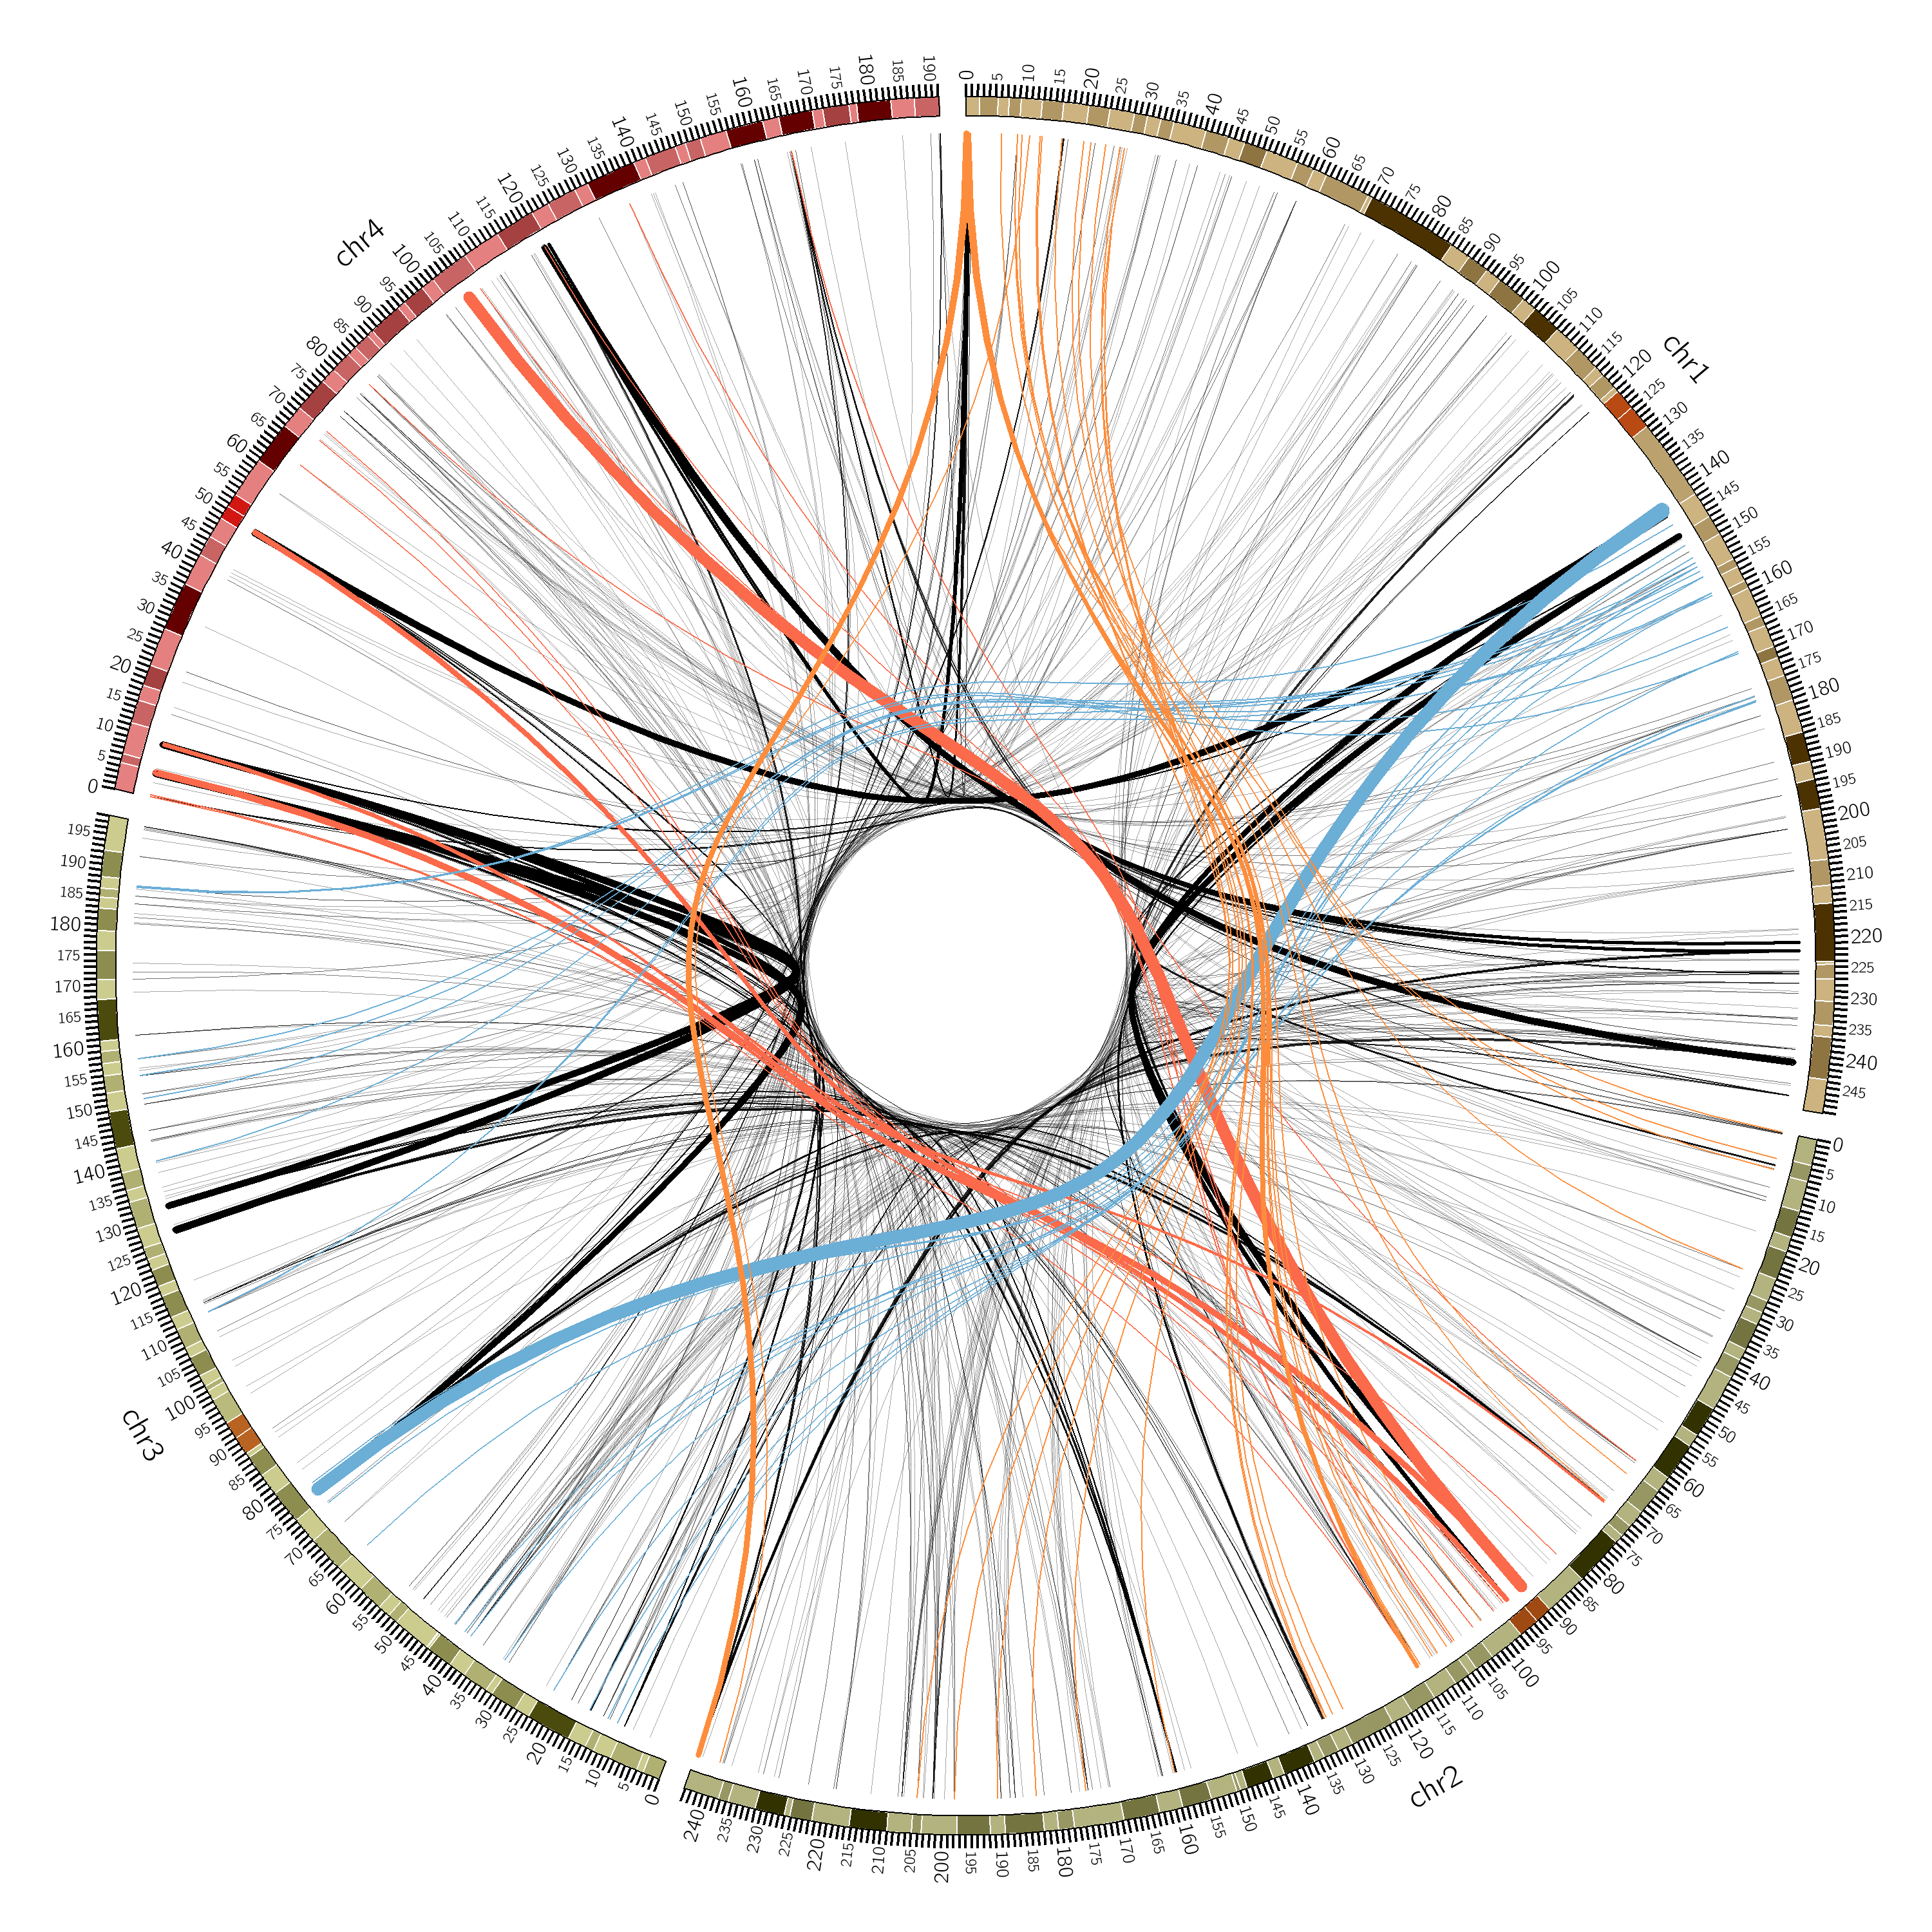

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part3.ipynb).

----